WIA1006 Group Assignment


> Groupmates: Vanessa, Boon Ping, Khai Hon, Jieru, Chuan Lin

> Title: 3 Highs and CHD Prediction with Meal Recommendation System





## Data Analysis

Import Libraries


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data = pd.DataFrame(pd.read_csv('/content/Dataset.csv'))

Preview data

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,exerciseMinPerWeek,vegetarian,BPMeds,prevalentStroke,prevalentHyp,...,totChol,sysBP,diaBP,BMI,heartRate,glucose (mg/dL),HighBP,Hypercholesterolemia,diabetes,TenYearCHD
0,1,39,4.0,0,0.0,101,1,0.0,0,0,...,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0
1,0,46,2.0,0,0.0,47,0,0.0,0,0,...,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0
2,1,48,1.0,1,20.0,26,0,0.0,0,0,...,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0
3,0,61,3.0,1,30.0,23,0,0.0,0,1,...,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1
4,0,46,3.0,1,23.0,6,0,0.0,0,0,...,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0,0


Data inspection

In [ ]:
data.shape

(4240, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   male                  4240 non-null   int64  
 1   age                   4240 non-null   int64  
 2   education             4135 non-null   float64
 3   currentSmoker         4240 non-null   int64  
 4   cigsPerDay            4211 non-null   float64
 5   exerciseMinPerWeek    4240 non-null   int64  
 6   vegetarian            4240 non-null   int64  
 7   BPMeds                4187 non-null   float64
 8   prevalentStroke       4240 non-null   int64  
 9   prevalentHyp          4240 non-null   int64  
 10  highBPFH              4240 non-null   int64  
 11  hyperchoFH            4240 non-null   int64  
 12  diabetesFH            4240 non-null   int64  
 13  totChol               4190 non-null   float64
 14  sysBP                 4240 non-null   float64
 15  diaBP                

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,exerciseMinPerWeek,vegetarian,BPMeds,prevalentStroke,prevalentHyp,...,totChol,sysBP,diaBP,BMI,heartRate,glucose (mg/dL),HighBP,Hypercholesterolemia,diabetes,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4240.000000,4240.000000,4187.000000,4240.000000,4240.000000,...,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,46.468632,0.289858,0.029615,0.005896,0.310613,...,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.464151,0.435377,0.025708,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,33.178138,0.453750,0.169544,0.076569,0.462799,...,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.498772,0.495865,0.158280,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,...,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,...,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,75.000000,1.000000,0.000000,0.000000,1.000000,...,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,115.000000,1.000000,1.000000,1.000000,1.000000,...,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing

Use isna() function to check missing values

In [ ]:
data.isna().sum()

male                      0
age                       0
education               105
currentSmoker             0
cigsPerDay               29
exerciseMinPerWeek        0
vegetarian                0
BPMeds                   53
prevalentStroke           0
prevalentHyp              0
highBPFH                  0
hyperchoFH                0
diabetesFH                0
totChol                  50
sysBP                     0
diaBP                     0
BMI                      19
heartRate                 1
glucose (mg/dL)         388
HighBP                    0
Hypercholesterolemia      0
diabetes                  0
TenYearCHD                0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,exerciseMinPerWeek,vegetarian,BPMeds,prevalentStroke,prevalentHyp,...,totChol,sysBP,diaBP,BMI,heartRate,glucose (mg/dL),HighBP,Hypercholesterolemia,diabetes,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,...,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,46.756698,0.295517,0.030344,0.005741,0.311646,...,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.464188,0.431383,0.027064,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,33.307270,0.456337,0.171557,0.075561,0.463229,...,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.498784,0.495337,0.162292,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,...,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,...,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,75.000000,1.000000,0.000000,0.000000,1.000000,...,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,115.000000,1.000000,1.000000,1.000000,1.000000,...,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000


Outlier analysis (for qualitative analysis)

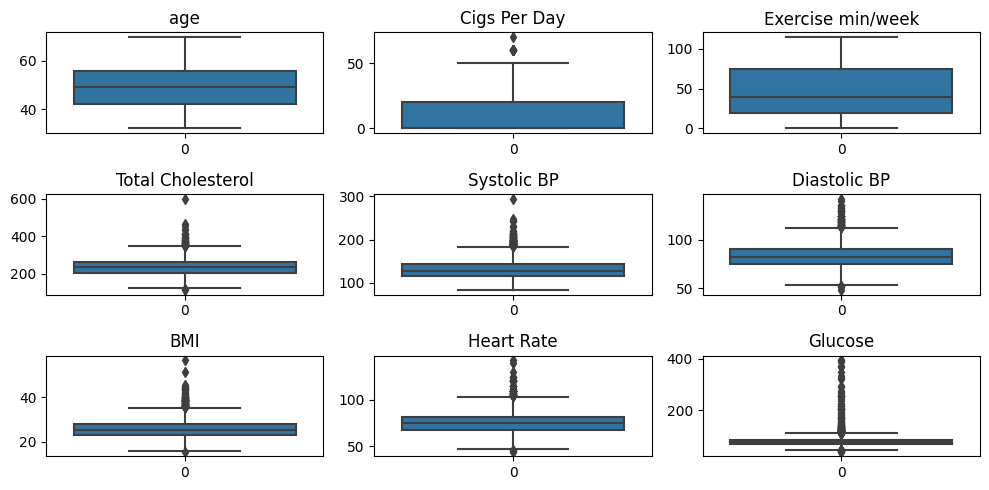

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(data['age'], ax = axs[0,0]).set(title="age")
plt2 = sns.boxplot(data['cigsPerDay'], ax = axs[0,1]).set(title="Cigs Per Day")
plt3 = sns.boxplot(data['exerciseMinPerWeek'], ax = axs[0,2]).set(title="Exercise min/week")
plt1 = sns.boxplot(data['totChol'], ax = axs[1,0]).set(title="Total Cholesterol")
plt2 = sns.boxplot(data['sysBP'], ax = axs[1,1]).set(title="Systolic BP")
plt3 = sns.boxplot(data['diaBP'], ax = axs[1,2]).set(title="Diastolic BP")
plt1 = sns.boxplot(data['BMI'], ax = axs[2,0]).set(title="BMI")
plt2 = sns.boxplot(data['heartRate'], ax = axs[2,1]).set(title="Heart Rate")
plt3 = sns.boxplot(data['glucose (mg/dL)'], ax = axs[2,2]).set(title="Glucose")
plt.tight_layout()

Outliers exist in total cholesterol, systolic BP, diastolc BP, BMI, heart rate and glucose features. However, upon research, the max values of the features are identified as logical and therefore not removed to maintain data size and aoid fallacy in the prediction model.

Visualization of numerical features

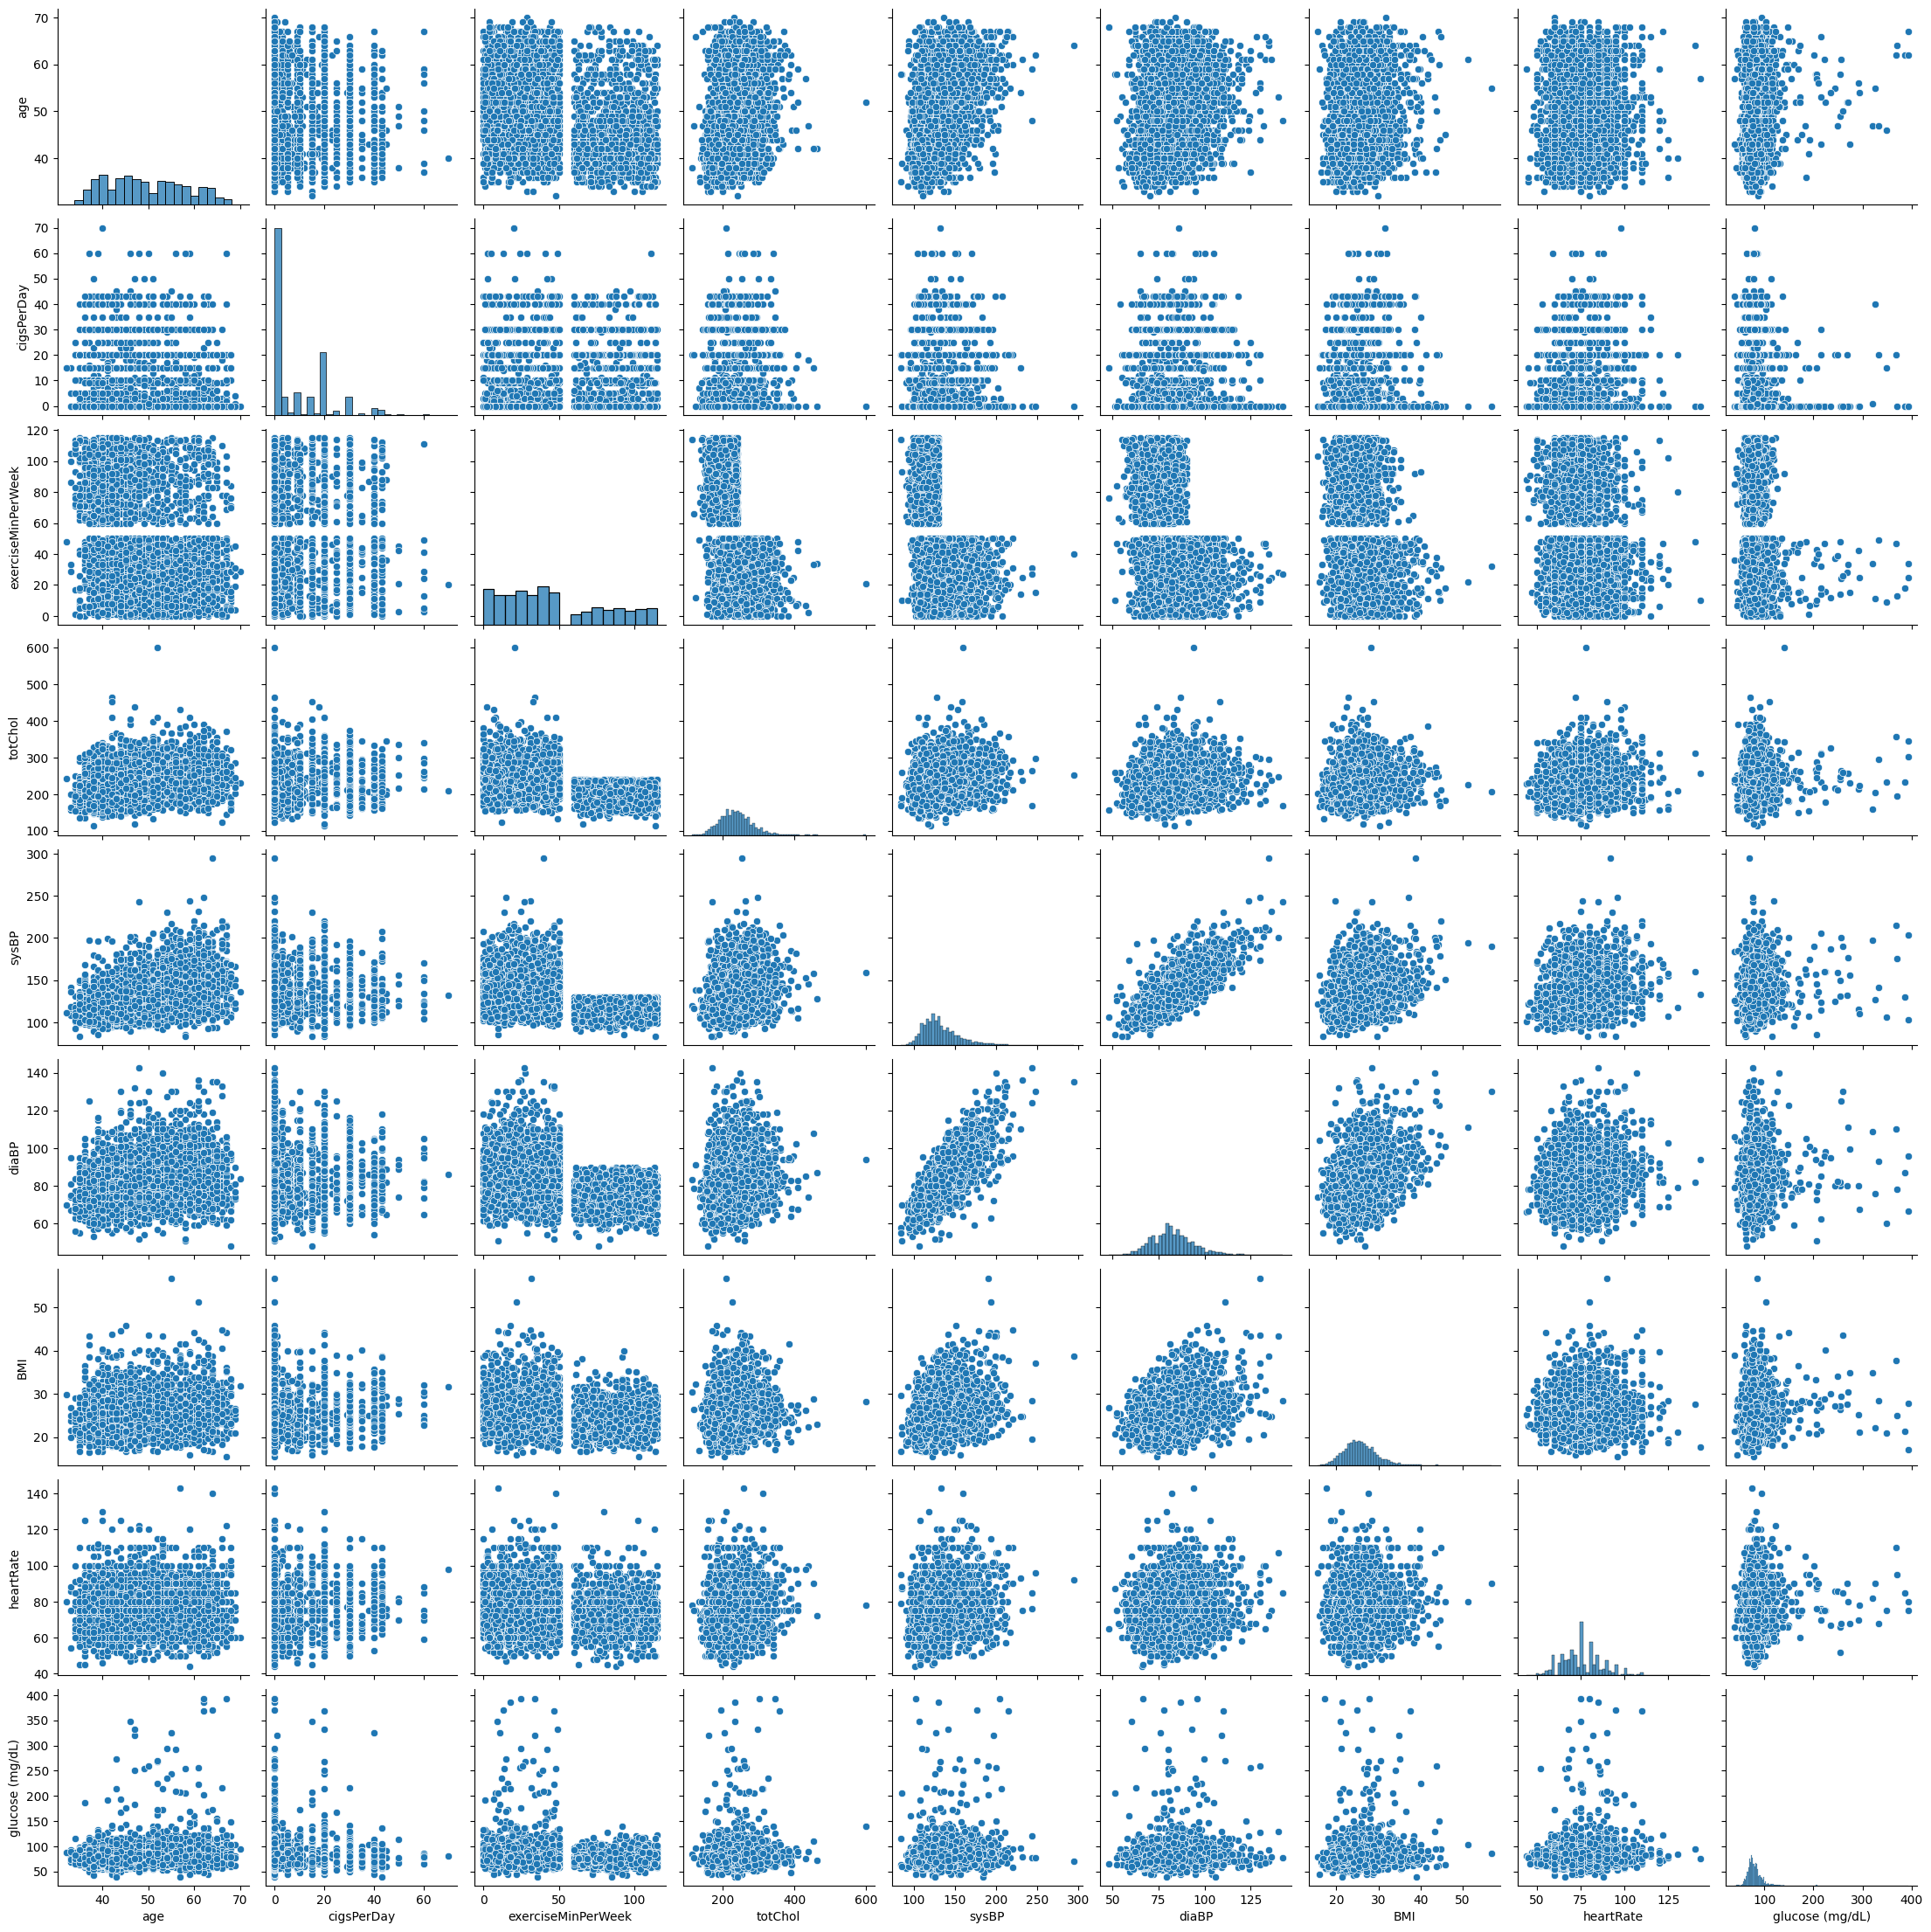

In [ ]:
numerical_data = data.iloc[:,[1,4,5,13,14,15,16,17,18]]
sns.pairplot(numerical_data)
plt.show()

Separate the features and targets

In [ ]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'exerciseMinPerWeek', 'vegetarian', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'highBPFH', 'hyperchoFH', 'diabetesFH', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose (mg/dL)', 'HighBP',
       'Hypercholesterolemia', 'diabetes', 'TenYearCHD'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-4].values
y_HighBP = data['HighBP'].values
y_Hypercholesterolemia = data['Hypercholesterolemia'].values
y_diabetes = data['diabetes'].values
y_TenYearCHD = data['TenYearCHD'].values

Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_HighBP_train, y_HighBP_test = train_test_split(X, y_HighBP, test_size=0.2, random_state=42)
X_train, X_test, y_Hypercholesterolemia_train, y_Hypercholesterolemia_test = train_test_split(X, y_Hypercholesterolemia, test_size=0.2, random_state=42)
X_train, X_test, y_diabetes_train, y_diabetes_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
X_train, X_test, y_TenYearCHD_train, y_TenYearCHD_test = train_test_split(X, y_TenYearCHD, test_size=0.2, random_state=42)

Scale the features with min-max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Note: StandardScaler was also used, the performance score of the two scalers have very little difference. Thus, in this program, I will go for min max scaling based on personal preference. 😃

In [ ]:
print('After scaling:')
print('Training set - min:', X_train[:, 0].min(), 'max:', X_train[:, 0].max())
print('Testing set - min:', X_test[:, 0].min(), 'max:', X_test[:, 0].max())

After scaling:
Training set - min: -0.9128709291752803 max: 1.0954451150103364
Testing set - min: -0.9128709291752803 max: 1.0954451150103364


Check correlation with heatmap

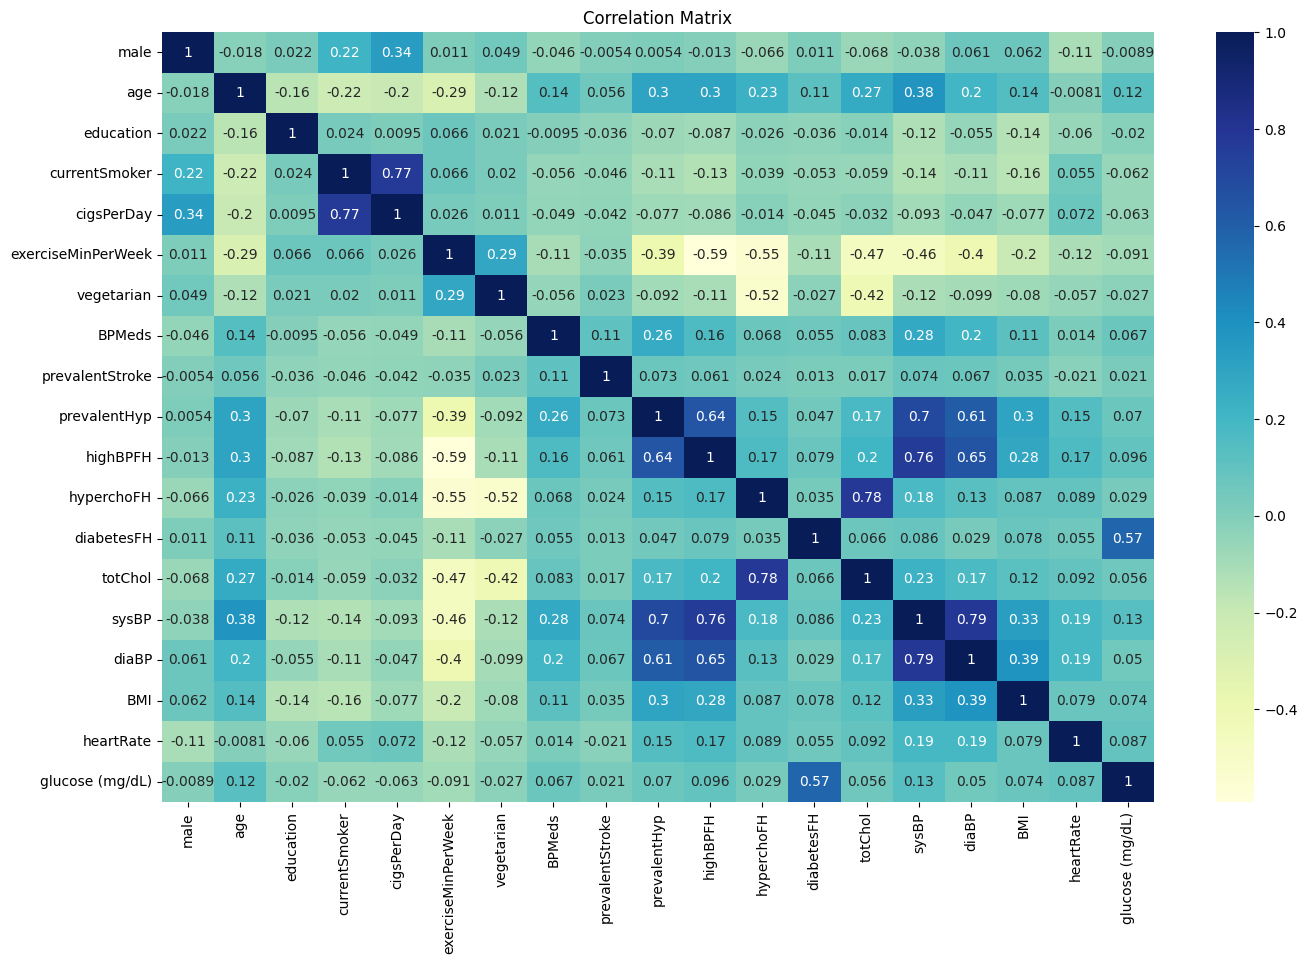

In [ ]:
feature_names =['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'exerciseMinPerWeek', 'vegetarian', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'highBPFH', 'hyperchoFH', 'diabetesFH', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose (mg/dL)']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
corr = X_train_df.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

## Classification Model Development (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_HighBP = LogisticRegression(random_state=42)
classifier_HighBP.fit(X_train, y_HighBP_train)

classifier_Hypercholesterolemia = LogisticRegression(random_state=42)
classifier_Hypercholesterolemia.fit(X_train, y_Hypercholesterolemia_train)

classifier_diabetes = LogisticRegression(random_state=42)
classifier_diabetes.fit(X_train, y_diabetes_train)

classifier_TenYearCHD = LogisticRegression(random_state=42)
classifier_TenYearCHD.fit(X_train, y_TenYearCHD_train)

LogisticRegression(random_state=42)

Perform prediction with Logistic Regression Classifier

In [ ]:
y_HighBP_pred = classifier_HighBP.predict(X_test)
y_Hypercholesterolemia_pred = classifier_Hypercholesterolemia.predict(X_test)
y_diabetes_pred = classifier_diabetes.predict(X_test)
y_TenYearCHD_pred = classifier_TenYearCHD.predict(X_test)

Model evaluation

In [ ]:
from sklearn.metrics import classification_report
print("HighBP Classification Report:")
print(classification_report(y_HighBP_test, y_HighBP_pred))

print("Hypercholesterolemia Classification Report:")
print(classification_report(y_Hypercholesterolemia_test, y_Hypercholesterolemia_pred))

print("diabetes Classification Report:")
print(classification_report(y_diabetes_test, y_diabetes_pred))

print("TenYearCHD Classification Report:")
print(classification_report(y_TenYearCHD_test, y_TenYearCHD_pred))

HighBP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       327

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732

Hypercholesterolemia Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       308

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732

diabetes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       0.91      0.95      0.93        22

    accuracy                           1.00       732
   macro avg       0.9

Evaluate the model using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
classifier_HighBP = LogisticRegression(random_state=42)
scores_HighBP = cross_val_score(classifier_HighBP, X, y_HighBP, cv=5)
print("HighBP Accuracy:", np.mean(scores_HighBP))

classifier_Hypercholesterolemia = LogisticRegression(random_state=42)
scores_Hypercholesterolemia = cross_val_score(classifier_Hypercholesterolemia, X, y_Hypercholesterolemia, cv=5)
print("Hypercholesterolemia Accuracy:", np.mean(scores_Hypercholesterolemia))

classifier_diabetes = LogisticRegression(random_state=42)
scores_diabetes = cross_val_score(classifier_diabetes, X, y_diabetes, cv=5)
print("diabetes Accuracy:", np.mean(scores_diabetes))

classifier_TenYearCHD = LogisticRegression(random_state=42)
scores_TenYearCHD = cross_val_score(classifier_TenYearCHD, X, y_TenYearCHD, cv=5)
print("TenYearCHD Accuracy:", np.mean(scores_TenYearCHD))

HighBP Accuracy: 0.9715716175909936
Hypercholesterolemia Accuracy: 0.9915293071098054
diabetes Accuracy: 0.9942593049419539
TenYearCHD Accuracy: 0.8477319787999071


# Classification Model Development (Random Forest)

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifierSVC_HighBP = SVC(kernel='linear', random_state=42)
classifierSVC_HighBP.fit(X_train, y_HighBP_train)

classifierSVC_Hypercholesterolemia = SVC(kernel='linear', random_state=42)
classifierSVC_Hypercholesterolemia.fit(X_train, y_Hypercholesterolemia_train)

classifierSVC_diabetes = SVC(kernel='linear', random_state=42)
classifierSVC_diabetes.fit(X_train, y_diabetes_train)

classifierSVC_TenYearCHD = SVC(kernel='linear', random_state=42)
classifierSVC_TenYearCHD.fit(X_train, y_TenYearCHD_train)

SVC(kernel='linear', random_state=42)

Perform prediction

In [ ]:
y_HighBP_pred = classifierSVC_HighBP.predict(X_test)
y_Hypercholesterolemia_pred = classifierSVC_Hypercholesterolemia.predict(X_test)
y_diabetes_pred = classifierSVC_diabetes.predict(X_test)
y_TenYearCHD_pred = classifierSVC_TenYearCHD.predict(X_test)

Evaluate the model

In [ ]:
print("HighBP Classification Report:")
print(classification_report(y_HighBP_test, y_HighBP_pred))

print("Hypercholesterolemia Classification Report:")
print(classification_report(y_Hypercholesterolemia_test, y_Hypercholesterolemia_pred))

print("diabetes Classification Report:")
print(classification_report(y_diabetes_test, y_diabetes_pred))

print("TenYearCHD Classification Report:")
print(classification_report(y_TenYearCHD_test, y_TenYearCHD_pred))

HighBP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       327

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732

Hypercholesterolemia Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       308

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732

diabetes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       0.91      0.95      0.93        22

    accuracy                           1.00       732
   macro avg       0.9

# Classification Model Development (Neural Network)

In [ ]:
Y = data[['HighBP', 'Hypercholesterolemia', 'diabetes', 'TenYearCHD']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
92/92 [==============================] - 1s 4ms/step - loss: 7.2891 - accuracy: 0.4833 - val_loss: 3.5675 - val_accuracy: 0.5915
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 4.1452 - accuracy: 0.5786 - val_loss: 4.5696 - val_accuracy: 0.5423
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 5.9930 - accuracy: 0.5731 - val_loss: 9.3333 - val_accuracy: 0.7131
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 10.2451 - accuracy: 0.5690 - val_loss: 13.8065 - val_accuracy: 0.2746
Epoch 5/50
92/92 [==============================] - 0s 3ms/step - loss: 15.6649 - accuracy: 0.5455 - val_loss: 20.5272 - val_accuracy: 0.2473
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 23.3641 - accuracy: 0.5079 - val_loss: 33.2145 - val_accuracy: 0.2022
Epoch 7/50
92/92 [==============================] - 0s 2ms/step - loss: 31.7119 - accuracy: 0.4751 - val_loss: 38.8878 - val_accuracy: 0.2404
Epoch 8/50
9

In [ ]:
y_pred = model.predict(X_test)

# Convert the predictions to binary values
y_pred_binary = np.round(y_pred)

# Print the classification report
print(classification_report(y_test, y_pred_binary))

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       327
           1       0.00      0.00      0.00       308
           2       0.00      0.00      0.00        22
           3       0.06      0.08      0.07       122

   micro avg       0.46      0.43      0.45       779
   macro avg       0.17      0.27      0.21       779
weighted avg       0.27      0.43      0.33       779
 samples avg       0.46      0.30      0.35       779

